Eğitim seti boyutu: 1500
Test seti boyutu: 1500


c:\Users\burak\OneDrive\Masaüstü\proje\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Kelime sözlüğü boyutu: (50, 128)
Sınıflandırma Başarısı: 0.3606666666666667
Sınıf 1 Doğruluk Yüzdesi: 37.04%
Sınıf 2 Doğruluk Yüzdesi: 82.46%
Sınıf 3 Doğruluk Yüzdesi: 35.87%
Sınıf 4 Doğruluk Yüzdesi: 43.01%
Sınıf 5 Doğruluk Yüzdesi: 31.31%
Sınıf 6 Doğruluk Yüzdesi: 28.89%
Sınıf 7 Doğruluk Yüzdesi: 13.54%
Sınıf 8 Doğruluk Yüzdesi: 50.51%
Sınıf 9 Doğruluk Yüzdesi: 89.11%
Sınıf 10 Doğruluk Yüzdesi: 19.80%
Sınıf 11 Doğruluk Yüzdesi: 9.38%
Sınıf 12 Doğruluk Yüzdesi: 16.67%
Sınıf 13 Doğruluk Yüzdesi: 9.26%
Sınıf 14 Doğruluk Yüzdesi: 11.88%
Sınıf 15 Doğruluk Yüzdesi: 56.00%

Ortalama Doğruluk Yüzdesi: 35.65%

Karmaşıklık Matrisi:
[[40  7 17  2 12  1  9  2  8  4  0  1  1  1  3]
 [ 0 94  0  0  4  0  2  1  6  0  0  0  0  0  7]
 [22  0 33  7  3  0  6  9  7  1  0  4  0  0  0]
 [ 4  0  0 40  0  3  3  7  4  2  4  8  4  4 10]
 [ 5 13  5  0 31  0  6  6 24  0  0  1  2  0  6]
 [ 0  0  0 11  3 26  0  7  8  0  1  4  6 14 10]
 [16 17  5  3 18  0 13  9 10  2  1  0  0  0  2]
 [ 0  2  1  8  2  1  2 50 10  1 

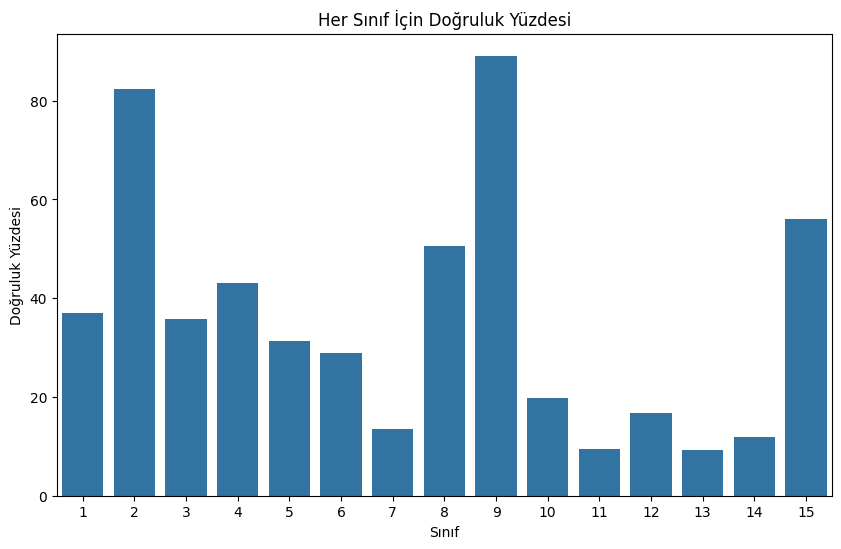

<Figure size 640x480 with 0 Axes>

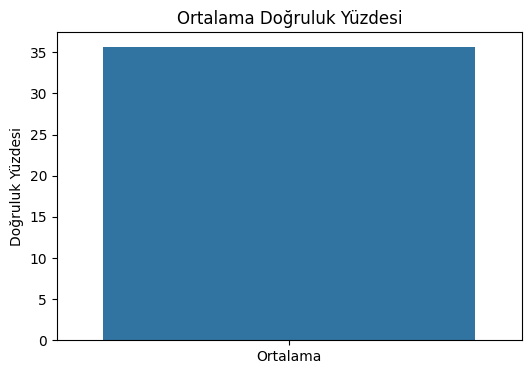

<Figure size 640x480 with 0 Axes>

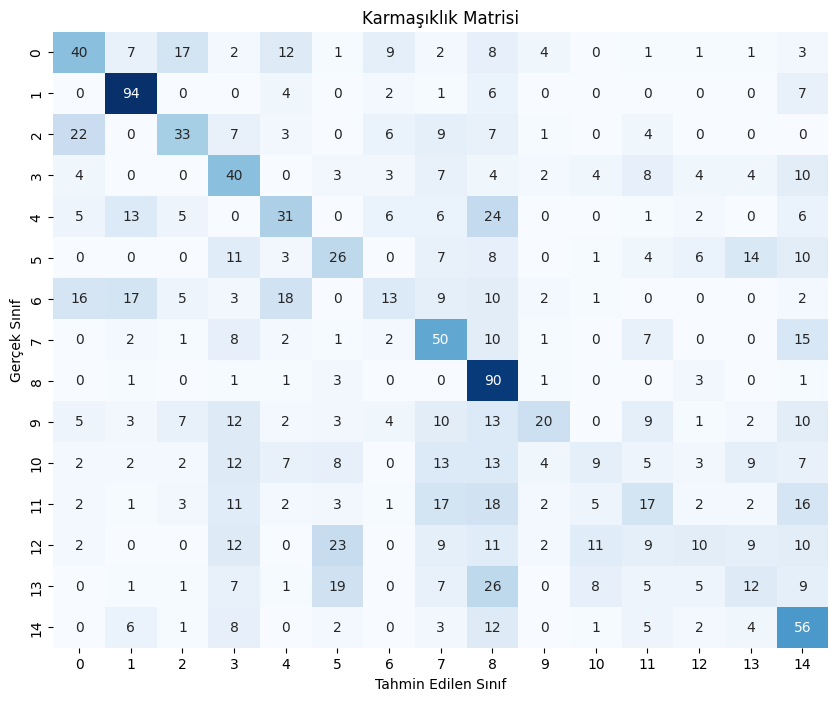

<Figure size 640x480 with 0 Axes>

In [8]:
# Gerekli kütüphaneleri içe aktaralım
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix

# Veri setini yükleme fonksiyonu
def load_data(data_folder):
    images = []  # Görüntülerin depolanacağı liste
    labels = []  # Sınıf etiketlerinin depolanacağı liste

    # Veri setini klasörler arasında gezerek yükle
    for class_folder in os.listdir(data_folder):
        class_path = os.path.join(data_folder, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                # Sadece .jpg veya .png uzantılı dosyaları al
                if image_path.endswith(".jpg") or image_path.endswith(".png"):
                    image = cv2.imread(image_path)  # Görüntüyü oku
                    image = cv2.resize(image, (200, 200))  # Görüntüyü 200x200 boyutuna yeniden boyutlandır
                    images.append(image)  # Görüntüyü listeye ekle
                    labels.append(class_folder)  # Sınıf etiketini listeye ekle

    return images, labels

# Veri setini eğitim ve test setlerine ayırma fonksiyonu
def split_data(images, labels, test_size=0.5, random_state=42):
    # Veri setini eğitim ve test setlerine bölelim
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return train_images, test_images, train_labels, test_labels

# SIFT özniteliklerini çıkarma fonksiyonu
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    features = []

    for image in images:
        # Gri tonlamaya dönüştür
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # SIFT özniteliklerini bul
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        # Eğer öznitelik bulunamazsa, boş bir array ekleyin
        if descriptors is None:
            descriptors = np.array([]).reshape(0, 128)

        features.append(descriptors)

    return features

# Görsel sözlük oluşturma fonksiyonu
def build_visual_dictionary(features, k=128):
    # Öznitelikleri birleştir
    all_features = np.vstack(features)

    # K-means kümeleme modelini oluştur
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Kümeleme modelini eğit
    kmeans.fit(all_features)

    # Görsel sözlüğü oluştur
    visual_dictionary = kmeans.cluster_centers_

    return visual_dictionary

# BoW özniteliklerini çıkarma fonksiyonu
def extract_bow_features(images, visual_dictionary):
    sift = cv2.SIFT_create()
    bow_features = []

    for image in images:
        # Gri tonlamaya dönüştür
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # SIFT özniteliklerini bul
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        # Eğer öznitelik bulunamazsa, boş bir vektör ekleyin
        if descriptors is None:
            bow_feature = np.zeros(visual_dictionary.shape[0])
        else:
            # Her bir SIFT özniteliğinin en yakın küme merkezini bul
            distances = euclidean_distances(descriptors, visual_dictionary)
            nearest_clusters = np.argmin(distances, axis=1)

            # Histogram oluştur
            bow_feature, _ = np.histogram(nearest_clusters, bins=range(len(visual_dictionary) + 1), density=True)

        # Normalize et
        bow_feature = normalize(bow_feature.reshape(1, -1))

        # Öznitelikleri listeye ekle
        bow_features.append(bow_feature.flatten())

    return bow_features

# Görüntüleri sınıflandırma fonksiyonu
def classify_images(train_bow_features, train_labels, test_bow_features, test_labels, k=7):
    # k-NN sınıflandırıcı modelini oluştur
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Eğitim verilerini kullanarak sınıflandırıcıyı eğit
    knn_classifier.fit(train_bow_features, train_labels)

    # Test verilerini kullanarak sınıflandırma yap
    predicted_labels = knn_classifier.predict(test_bow_features)

    # Sınıflandırma başarısını hesapla
    accuracy = accuracy_score(test_labels, predicted_labels)

    return predicted_labels, accuracy

# Performans değerlendirme fonksiyonu
def evaluate_performance(test_labels, predicted_labels):
    # Sınıflandırma raporunu ve karmaşıklık matrisini hesapla
    classification_rep = classification_report(test_labels, predicted_labels)
    confusion_mat = confusion_matrix(test_labels, predicted_labels)

    # Her sınıf için doğruluk yüzdesini hesapla
    class_accuracy = confusion_mat.diagonal() / confusion_mat.sum(axis=1) * 100

    # Ortalama doğruluk yüzdesini hesapla
    average_accuracy = np.mean(class_accuracy)

    return class_accuracy, average_accuracy, classification_rep, confusion_mat

# Veri setinin bulunduğu klasör
data_folder = "D:\\data\\data\\train"

# Veriyi yükle
images, labels = load_data(data_folder)

# Veriyi eğitim ve test setlerine böl
train_images, test_images, train_labels, test_labels = split_data(images, labels)

# Eğitim ve test setlerinin boyutlarını kontrol et
print("Eğitim seti boyutu:", len(train_images))
print("Test seti boyutu:", len(test_images))

# Eğitim seti için SIFT özniteliklerini çıkar
train_sift_features = extract_sift_features(train_images)

# Test seti için SIFT özniteliklerini çıkar
test_sift_features = extract_sift_features(test_images)

# Kelime sözlüğünü oluştur
visual_dictionary = build_visual_dictionary(train_sift_features, k=50)

# Oluşturulan kelime sözlüğünün boyutunu kontrol et
print("Kelime sözlüğü boyutu:", visual_dictionary.shape)

# Test seti için kelime çantası özniteliklerini çıkar
test_bow_features = extract_bow_features(test_images, visual_dictionary)

# Eğitim seti için kelime çantası özniteliklerini çıkar
train_bow_features = extract_bow_features(train_images, visual_dictionary)

# Sınıflandırma yap
predicted_labels, accuracy = classify_images(train_bow_features, train_labels, test_bow_features, test_labels, k=7)

# Sınıflandırma başarısını ekrana yazdır
print("Sınıflandırma Başarısı:", accuracy)

# Performans sonuçlarını değerlendir
class_accuracy, average_accuracy, classification_rep, confusion_mat = evaluate_performance(test_labels, predicted_labels)

# Her sınıf için doğruluk yüzdelerini ve ortalama doğruluk yüzdesini ekrana yazdır
for i, acc in enumerate(class_accuracy):
    print(f"Sınıf {i+1} Doğruluk Yüzdesi: {acc:.2f}%")

print(f"\nOrtalama Doğruluk Yüzdesi: {average_accuracy:.2f}%\n")

# Karmaşıklık matrisini ekrana yazdır
print("Karmaşıklık Matrisi:")
print(confusion_mat)

# Sınıflandırma raporunu ekrana yazdır
print("\nSınıflandırma Raporu:")
print(classification_rep)

import matplotlib.pyplot as plt
import seaborn as sns

# ... (Kodun geri kalanı)

# Görselleştirmeler
# Doğruluk yüzdesi grafiği
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, len(class_accuracy) + 1), y=class_accuracy)
plt.title('Her Sınıf İçin Doğruluk Yüzdesi')
plt.xlabel('Sınıf')
plt.ylabel('Doğruluk Yüzdesi')
plt.show()
plt.savefig('dogruluk_yuzdesi_grafik.png')  # PNG formatında kaydet



# Karmaşıklık matrisi ısı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()
plt.savefig('karmasiklik_matrisi_grafik.png')  # PNG formatında kaydet

